In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import seaborn as sns
from sklearn import metrics
from scipy import cluster as scpcluster

In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"
data=pd.read_csv(url, skiprows=0, header=None, delim_whitespace=True)
data.columns = ['Area','Perimeter','Compactness','Length of Kernel','Width of Kernel','Asymmetry Coeff','Kernel Groove Length','Type']

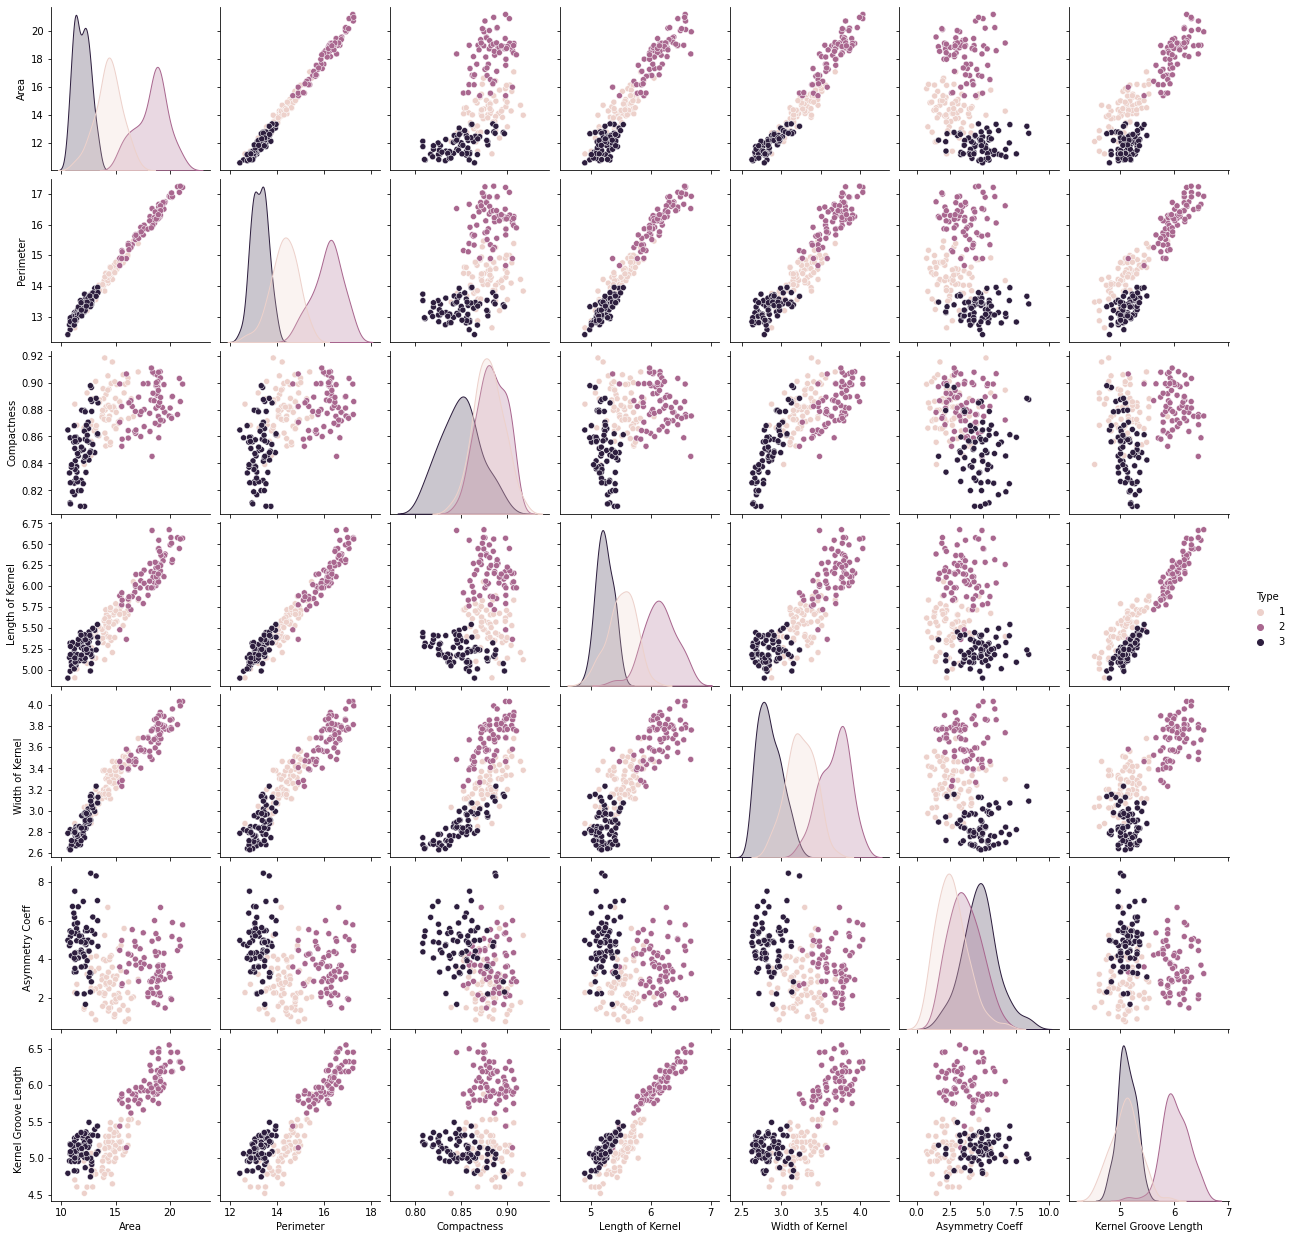

In [4]:
sns.pairplot(data,hue='Type')

In [5]:
x = data[['Length of Kernel','Width of Kernel']]

K MEANS (SKLearn): 

In [6]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [7]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
kmeans.cluster_centers_

array([[6.23025862, 3.73081034],
       [5.22687059, 2.88291765],
       [5.61720896, 3.32644776]])

Text(0.5, 1.0, 'Scatter Plot for Clusters')

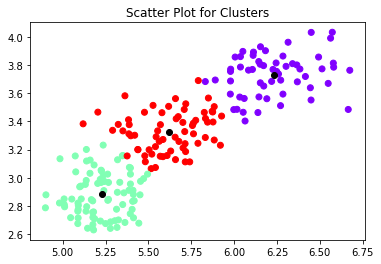

In [9]:
plt.scatter(data = x,x = 'Length of Kernel', y = 'Width of Kernel', c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Scatter Plot for Clusters')

In [10]:
data['y_kmeans'] = pd.Series(kmeans.labels_)
print("Silhouette score for K-Means Clustering is {}".format(metrics.silhouette_score(x, labels=data['y_kmeans'])))

Silhouette score for K-Means Clustering is 0.5147547447584228


AGGLOMERATIVE CLUSTERING (SKLearn) :

In [11]:
agg_clst_single = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single').fit(x)

In [12]:
agg_clst_single.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [13]:
data['y_agg_single'] = pd.Series(agg_clst_single.labels_)
print("Silhouette score for Agglomerative Clustering (Single) is {}".format(metrics.silhouette_score(x, labels=data['y_agg_single'])))

Silhouette score for Agglomerative Clustering (Single) is -0.15566503844762203


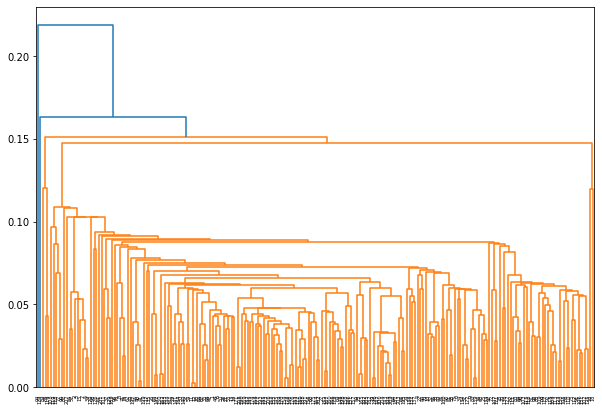

In [14]:
single = scpcluster.hierarchy.linkage(x, 'single')
plt.figure(figsize=(10, 7))
scpcluster.hierarchy.dendrogram(single)
plt.show()

Text(0.5, 1.0, 'Scatter Plot for Clusters')

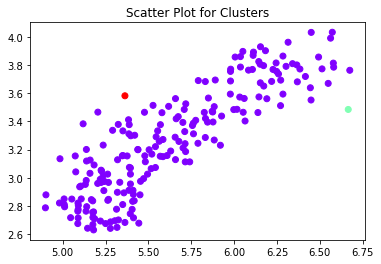

In [15]:
plt.scatter(data = x,x = 'Length of Kernel', y = 'Width of Kernel', c=agg_clst_single.labels_, cmap='rainbow')
plt.title('Scatter Plot for Clusters')

In [16]:
agg_clst_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete').fit(x)

In [17]:
agg_clst_complete.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2], dtype=int64)

In [18]:
data['y_agg_complete'] = pd.Series(agg_clst_complete.labels_)
print("Silhouette score for Agglomerative Clustering (Complete) is {}".format(metrics.silhouette_score(x, labels=data['y_agg_complete'])))

Silhouette score for Agglomerative Clustering (Complete) is 0.49284339362092106


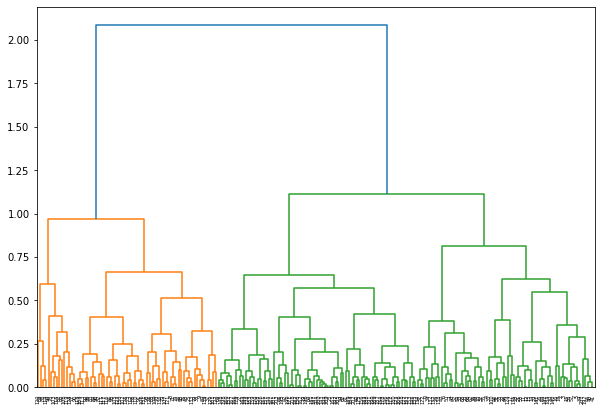

In [19]:
complete = scpcluster.hierarchy.linkage(x, 'complete')
plt.figure(figsize=(10, 7))
scpcluster.hierarchy.dendrogram(complete)
plt.show()

Text(0.5, 1.0, 'Scatter Plot for Clusters')

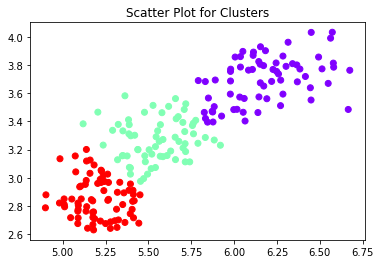

In [20]:
plt.scatter(data = x,x = 'Length of Kernel', y = 'Width of Kernel', c=agg_clst_complete.labels_, cmap='rainbow')
plt.title('Scatter Plot for Clusters')

In [21]:
agg_clst_average = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average').fit(x)

In [22]:
agg_clst_average.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [23]:
data['y_agg_average'] = pd.Series(agg_clst_average.labels_)
print("Silhouette score for Agglomerative Clustering (Average) is {}".format(metrics.silhouette_score(x, labels=data['y_agg_average'])))

Silhouette score for Agglomerative Clustering (Average) is 0.506183185250866


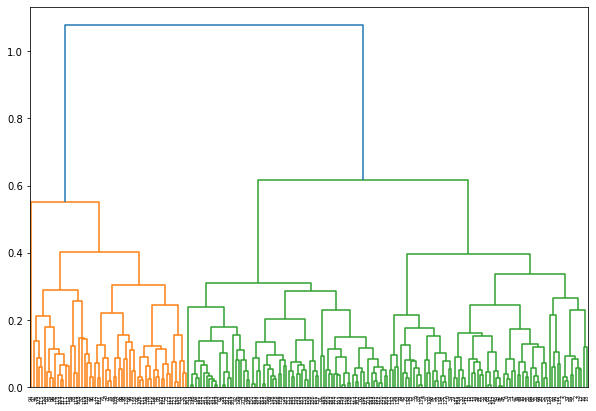

In [24]:
average = scpcluster.hierarchy.linkage(x, 'average')
plt.figure(figsize=(10, 7))
scpcluster.hierarchy.dendrogram(average)
plt.show()

Text(0.5, 1.0, 'Scatter Plot for Clusters')

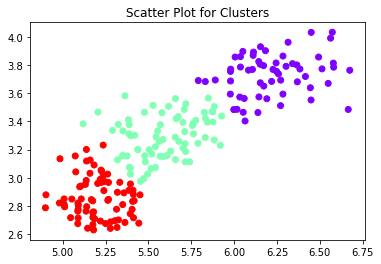

In [25]:
plt.scatter(data = x,x = 'Length of Kernel', y = 'Width of Kernel', c=agg_clst_average.labels_, cmap='rainbow')
plt.title('Scatter Plot for Clusters')

ELBOW CURVE :

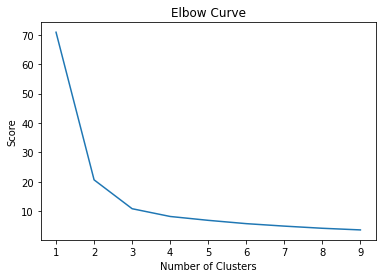

In [26]:
N = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in N]
score = [kmeans[i].fit(x).inertia_ for i in range(len(kmeans))]
plt.plot(N,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

K Means Scratch :

In [27]:
import random
def random_centroids(X,n_clusters):
    c=np.array([]).reshape(X.shape[1],0) 
    for k in range(n_clusters):
        c=np.c_[c,X.iloc[random.randint(0,X.shape[0]-1)]]
    return c

def new_centroids(X, labels,n_clusters):
    c = np.zeros((n_clusters, X.shape[1]))
    for k in range(n_clusters):
        c[k,:]=np.mean(X.iloc[labels == k, :], axis=0)
    c=c.transpose()
    return c

def distance_calculator(X, centroids,n_clusters):
    d=np.array([]).reshape(X.shape[0],0)
    for k in range(n_clusters):
        temp=np.sum((X-centroids[:,k])**2,axis=1)
        d=np.c_[d,temp]
    return d

def min_distance_cluster(distance):
    return np.argmin(distance, axis=1)
    
def fit(X,n_clusters,max_iter=300):
    centroids = random_centroids(X,n_clusters)
    for i in range(max_iter):
        old_centroid = centroids
        distance = distance_calculator(X, old_centroid,n_clusters)
        labels = min_distance_cluster(distance)
        centroids = new_centroids(X, labels,n_clusters)
        if np.all(old_centroid == centroids):
            break
    return centroids,predict(X,old_centroid,n_clusters)
    
def predict(X,old_centroid,n_clusters):
    distance = distance_calculator(X, old_centroid,n_clusters)
    return min_distance_cluster(distance)

centroids,labels = fit(X=x,n_clusters=3)

Text(0.5, 1.0, 'Scatter Plot for Clusters')

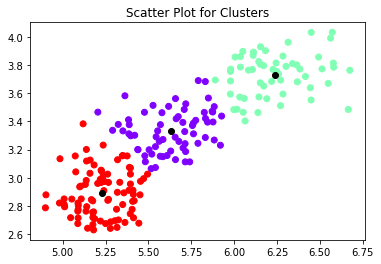

In [28]:
plt.scatter(data = x,x = 'Length of Kernel', y = 'Width of Kernel', c=labels, cmap='rainbow')
plt.scatter(centroids[0] ,centroids[1], color='black')
plt.title('Scatter Plot for Clusters')

Agglomerative Scratch :

In [ ]:
import math
def agglomerative(X , k, linkage):
    clusters = [[i] for i in range(len(X))][:10]
    dist_matrix = [[math.sqrt(np.sum(np.square(np.subtract(X.iloc[i], X.iloc[j])))) for j in range(len(X))] for i in range(len(X))][:10]
    while len(clusters) != k:
        m = -1
        n = -1
        min_dist = 0
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                distance = 0
                if linkage == 'single':
                    distance = 9999#99999
                for c1 in clusters[i]:
                    for c2 in clusters[j]:
                        if linkage == 'complete':
                            distance = max(distance, dist_matrix[c1][c2])
                        elif linkage == 'single':
                            distance = min(distance, dist_matrix[c1][c2])
                        else:
                            distance += dist_matrix[c1][c2]
                if linkage == 'average':
                    distance /= (len(clusters[i]) * len(clusters[j]))
                if m == -1 or distance < min_dist:
                    min_dist = distance
                    m = i
                    n = j
    clusters[m].extend(clusters.pop(n))
    labels = [-1 for _ in range(len(X))]
    for i in range(k):
        for c in clusters[i]:
            labels[c] = i
    return labels

In [ ]:
single = agglomerative(x,3,'single')
complete = agglomerative(x,3,'complete')
average = agglomerative(x,3,'average')

ValueError: RGBA values should be within 0-1 range

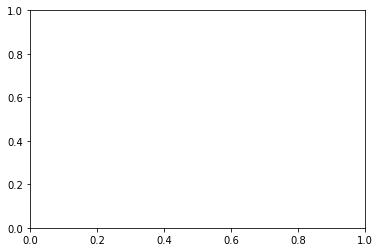

In [31]:
plt.scatter(data = x,x = 'Length of Kernel', y = 'Width of Kernel', c=single, cmap='rainbow')
plt.title('Scatter Plot for Clusters : Single')

ValueError: RGBA values should be within 0-1 range

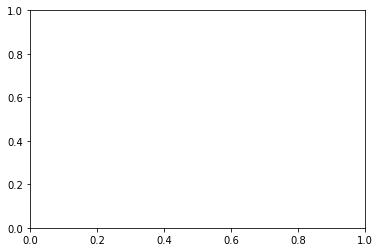

In [32]:
plt.scatter(data = x,x = 'Length of Kernel', y = 'Width of Kernel', c=complete, cmap='rainbow')
plt.title('Scatter Plot for Clusters : Complete')

ValueError: RGBA values should be within 0-1 range

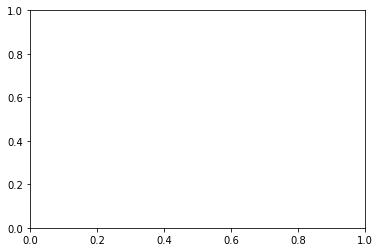

In [33]:
plt.scatter(data = x,x = 'Length of Kernel', y = 'Width of Kernel', c=average, cmap='rainbow')
plt.title('Scatter Plot for Clusters : Average')